# ***IML-MUSIC GENRE CLASSIFICATION***

*Bhavana M - 1RVU22BSC014*

*Prakhyath B S - 1RVU22BSC070*

***Importing Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/MyDrive/')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive


***Read the CVS File***

In [4]:
import pandas as pd
# Read the CSV file
df = pd.read_csv('../MyDrive/Music_genre_classification_data/features_3_sec.csv')
# Display the first few rows of the dataframe
df.head()


filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

**About the Dataset**

In [5]:
df.shape
(9990, 60)

(9990, 60)

In [6]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [7]:
df=df.drop(labels='filename', axis=1)

<ipython-input-44-ea0842e9b65b>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 256)


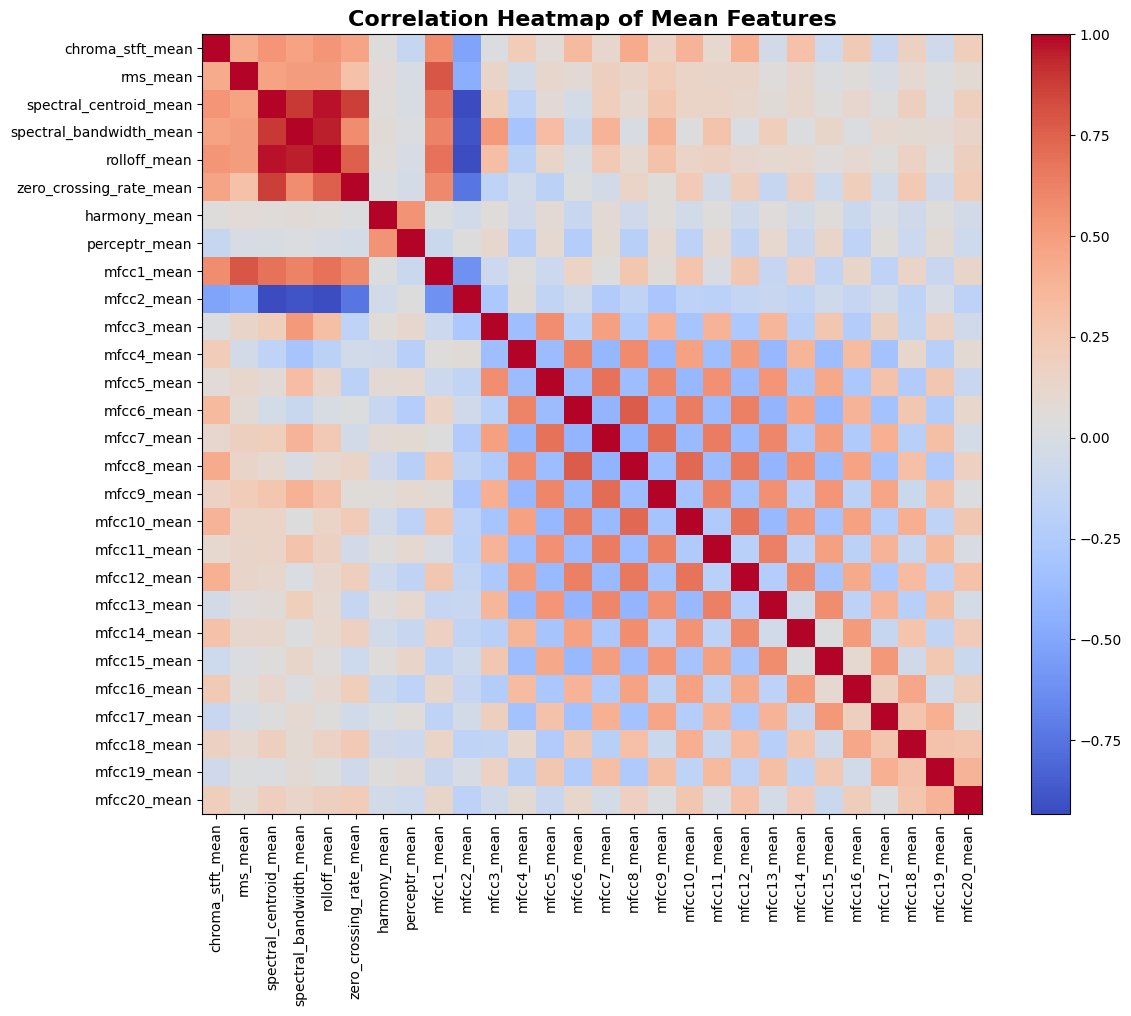

In [44]:
mean_columns = df.filter(regex='_mean$')

correlation_matrix = mean_columns.corr()

# Create a boolean mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = plt.cm.get_cmap('coolwarm', 256)

# Draw the heatmap with the mask and correct aspect ratio
plt.imshow(correlation_matrix, cmap=cmap, interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap of Mean Features', fontsize=16, fontweight='bold')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()


<ipython-input-61-34ed2c28bb88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="tempo", data=x, palette='husl')


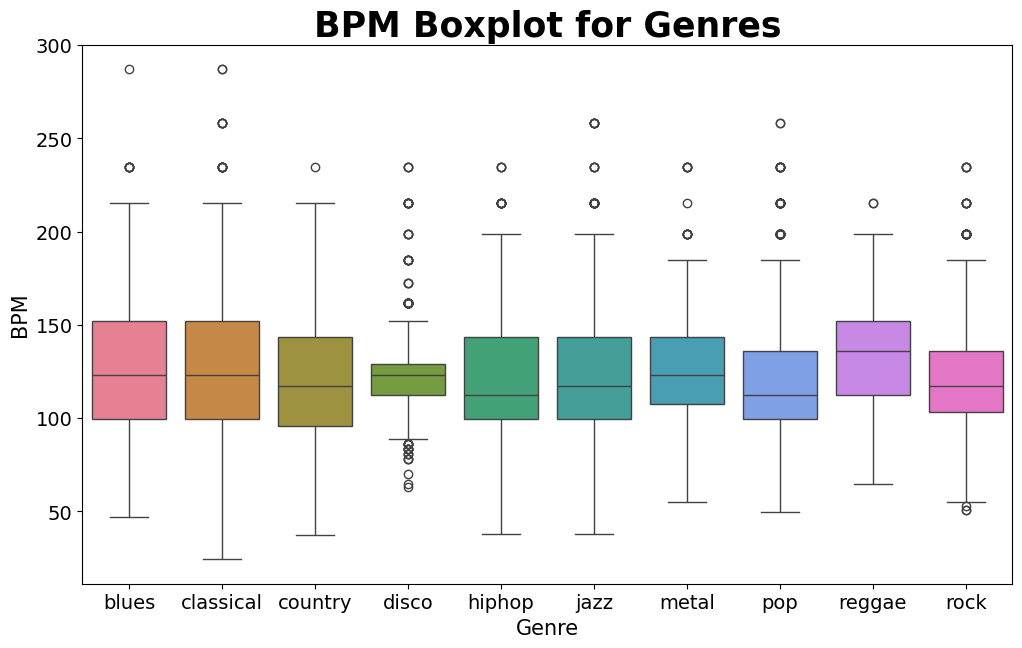

In [61]:

# Subset the DataFrame to include only the 'label' and 'tempo' columns
x = df[["label", "tempo"]]

# Create the plot
f, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

# Styling the plot with titles and labels
plt.title('BPM Boxplot for Genres', fontsize=25, fontweight='bold')
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)

# Setting the font size for x and y ticks for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

In [56]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Assuming df is defined somewhere above this code block
data = df.iloc[:, 1:]  # Assuming the first column is the label
y = data['label']
X = data.drop(columns=['label'])

#### NORMALIZE X ####
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=X.columns)

#### PCA 2 COMPONENTS ####
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis=1)

print(pca.explained_variance_ratio_)


[0.26745621 0.18238003]


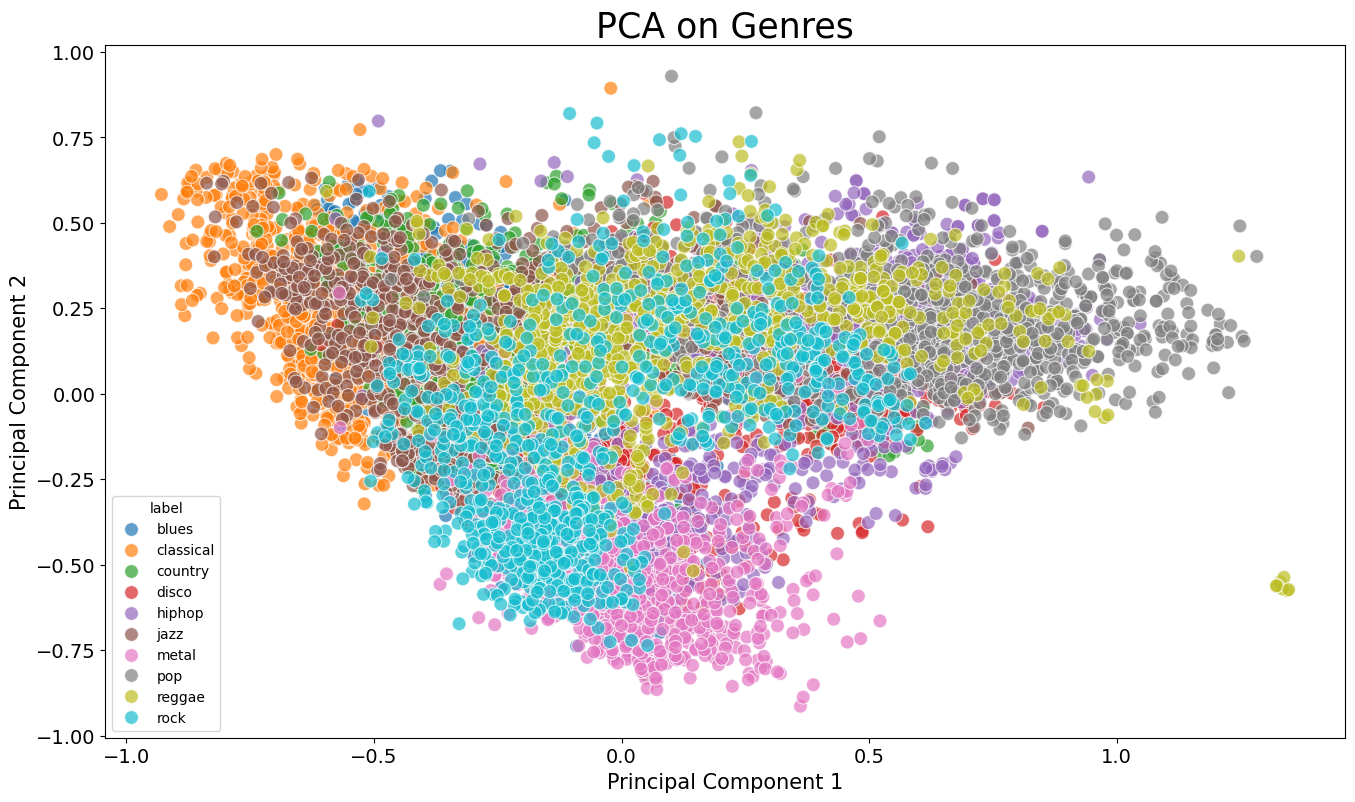

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
sns.scatterplot(x="principal component 1", y="principal component 2", data=finalDf, hue="label", alpha=0.7, s=100)

plt.title('PCA on Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.savefig("PCA_Scatter.jpg")
plt.show()


**Understanding the Audio Files**

In [8]:
audio_recording="../MyDrive/Music_genre_classification_data/genres_original/country/country.00050.wav"
data , sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [9]:
data, sr = librosa.load(audio_recording)

In [10]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04446704,  0.06373047,  0.05768819, ..., -0.13878524,
        -0.11868108, -0.05903753], dtype=float32),
 45600)

***Audio Libraries Used***

In [11]:
import IPython
IPython.display. Audio(data, rate=sr)

***Visualizing Audio Files***

**Plot Raw Wave Files**

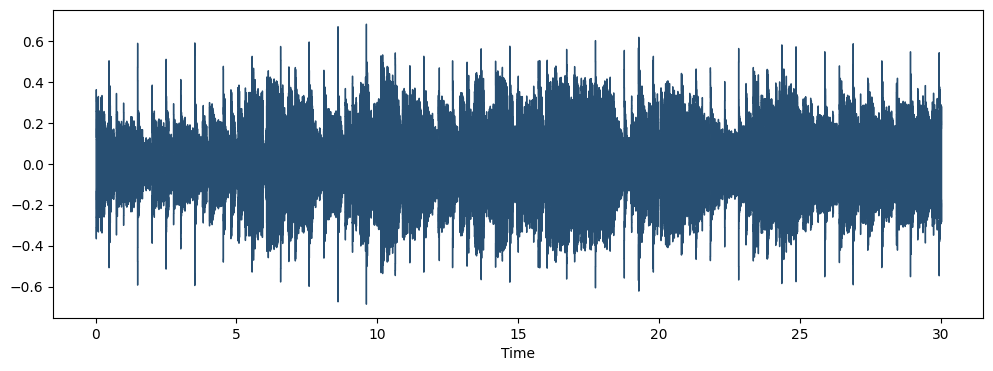

In [12]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="#284F72")
plt.show()

**Spectrograms**

<ipython-input-13-6ff8b0ee93be>:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


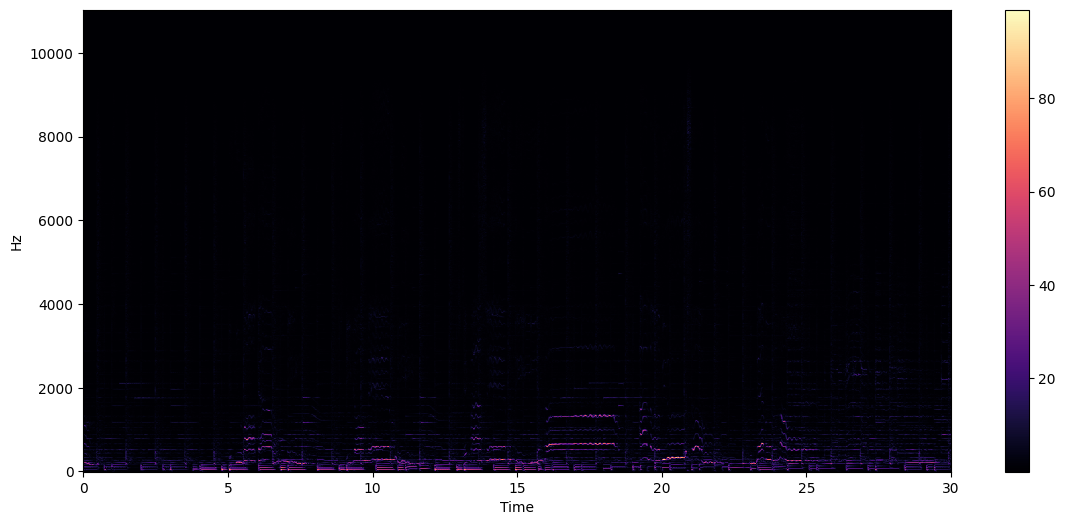

In [13]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

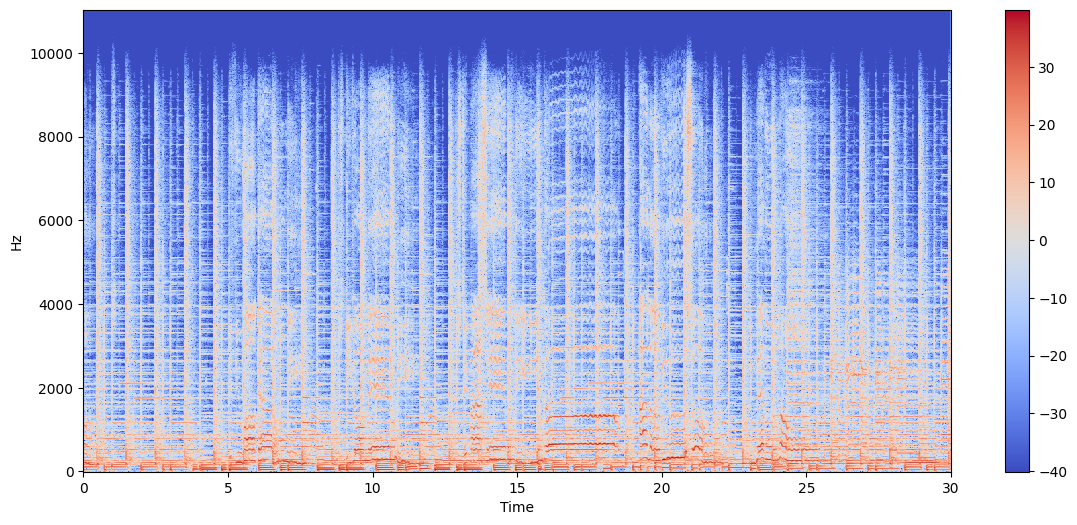

In [14]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

**Spectral Rolloff**

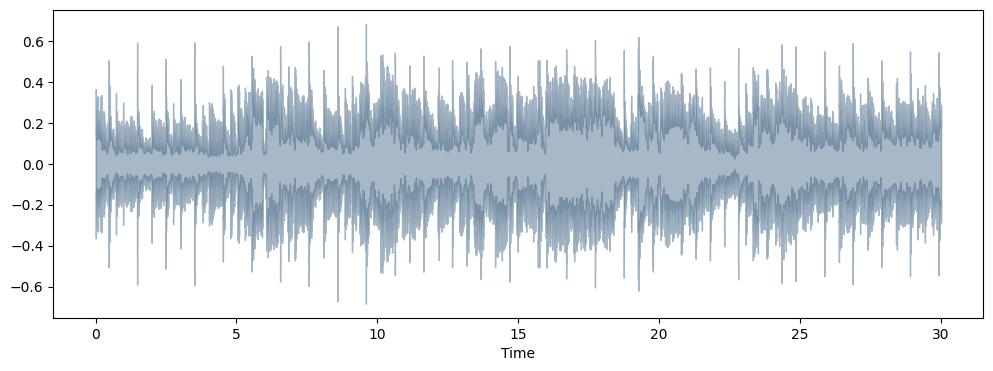

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Assuming 'data' and 'sr' are properly defined
# If 'data' is an audio signal and 'sr' is its sampling rate, then this should work

spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr)[0]

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#284F72")


**Chroma Feature**

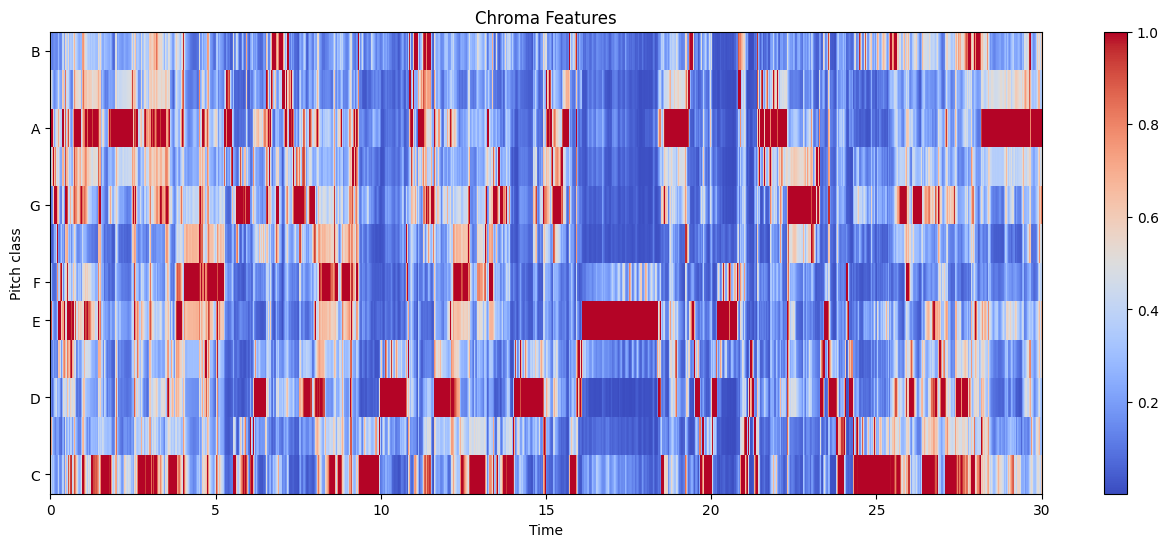

In [16]:
import librosa.display as lplt

# Assuming 'data' and 'sr' are properly defined
# If 'data' is an audio signal and 'sr' is its sampling rate, then this should work

chroma = librosa.feature.chroma_stft(y=data, sr=sr)

plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()


**Zero Crossing Rate**

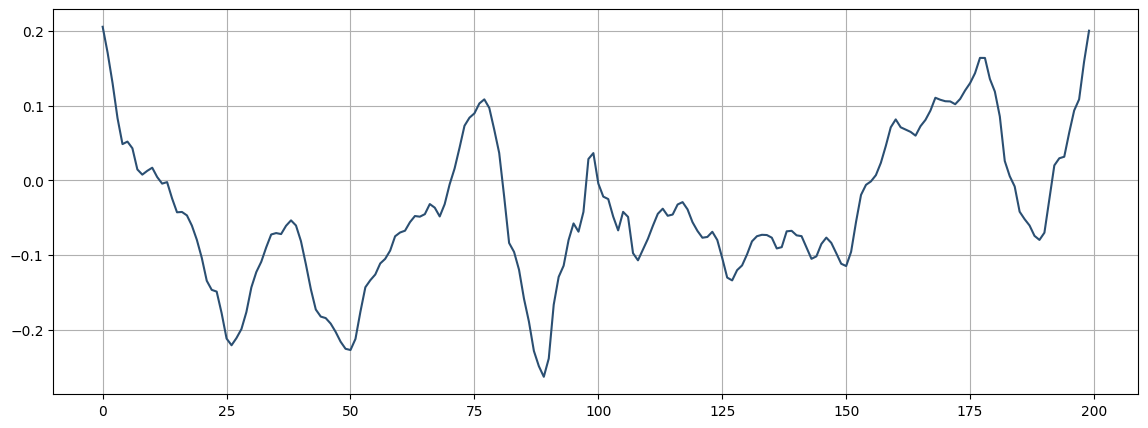

In [17]:
start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [18]:
zero_cross_rate = librosa.zero_crossings (data [start:end], pad=False)
print("The number of zero-crossings is", sum(zero_cross_rate))

The number of zero-crossings is 8


***Feature Extraction***

In [19]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [20]:
y = convertor.fit_transform(class_list)

In [21]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

***Scaling the Features***

In [22]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

***Dividing Data Into Training and Testing Sets***

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
len(y_train)

6693

In [25]:
len(y_test)

3297

***Building the Model***

In [26]:
from keras.models import Sequential
#from keras.wrappers.scikit_learn import KerasClassifier

In [27]:
def trainModel(model, epochs, optimizer):
  batch_size = 128
#callback myCallback()
  model.compile(optimizer-optimizer,
                loss='sparse_categorical_crossentropy',
                metrics='accuracy'
                )
  return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

In [30]:
def plotValidate(history):
  print("Validation Accuracy", max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

# Print model summary
print(model.summary())

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

***Model Evaluation***

In [64]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is:", test_loss)
print("\nThe Best test Accuracy is:", test_acc)


26/26 [==============================] - 0s 3ms/step - loss: 0.5764 - accuracy: 0.9318
The test Loss is: 0.5763994455337524

The Best test Accuracy is: 0.9317561388015747


# ***REPORT***

***Introduction***

*Music genre classification stands as a significant endeavor in the landscape of music analysis and information retrieval. It encompasses the process of categorizing audio tracks into distinct genres such as jazz, rock, pop, country, and more. The automation of this classification process through the utilization of deep learning techniques holds immense potential, enabling applications such as music recommendation systems, playlist generation, and genre-based content organization. This project aims to leverage deep learning methodologies to achieve accurate and efficient music genre classification.*



***Dataset Description***

*The cornerstone of this project is the dataset utilized for training and evaluation. This dataset comprises audio recordings from diverse music genres, with each audio clip represented by a comprehensive set of extracted features. These features serve as the basis for training machine learning models for genre classification. The dataset includes:*

*-   Features  : Extracted using the powerful Librosa library, the features encapsulate a wide array of audio characteristics, including spectrograms, spectral centroids, chroma features, and zero-crossing rates. These features provide rich insights into the underlying structure and nuances of each audio clip.*

*-   Genres  : The dataset encompasses a diverse collection of music genres, with each genre represented as a label for classification purposes. Common genres include country, jazz, rock, pop, electronic, etc.*

*-   Size  : With a substantial volume of data, the dataset comprises 9990 audio samples, each characterized by a comprehensive set of 60 features.*

***Steps for Machine Learning Project***  

 ***Data Preprocessing***


*Data preprocessing serves as a crucial initial step in preparing the dataset for model training. This involves a series of essential tasks, including:*

*-   Loading Audio Files  : Leveraging the robust capabilities of the Librosa library to load audio files in numerical format, facilitating subsequent feature extraction and analysis.*

*-   Feature Extraction  : Employing Librosa to extract pertinent audio features from each audio clip. This process involves the extraction of various acoustic features such as spectrograms, chroma features, spectral centroids, and zero-crossing rates, which collectively capture the essential characteristics of the audio.*

*-   Categorical Encoding  : Encoding categorical variables, such as music genres, into numerical form using LabelEncoder from the scikit-learn library. This ensures compatibility with machine learning models and facilitates seamless classification.*


***Model Selection and Evaluation Metrics***

*For the task of music genre classification, a deep learning approach is adopted, leveraging the powerful TensorFlow and Keras libraries. The chosen model architecture comprises multiple dense layers with dropout regularization to mitigate overfitting and enhance generalization.*

*Evaluation Metrics  :*

*-   Loss Function  : Sparse Categorical Crossentropy is employed as the loss function, measuring the disparity between predicted and actual genre labels.*

*-   Metrics  : Accuracy serves as the primary evaluation metric, quantifying the model's ability to correctly classify audio clips into their respective genres.*



*Model Training*

*Following data preprocessing, the model is trained on the preprocessed audio features alongside their corresponding genre labels. Training entails iteratively optimizing the model parameters to minimize the loss function and improve classification accuracy.*



*Model Evaluation*  

*Upon completion of training, the model's performance is evaluated on a distinct test set to assess its efficacy in genre classification. Performance metrics such as accuracy are computed to gauge the model's ability to generalize to unseen data.*







***Observation***

*During the evaluation phase, several observations are made regarding the classifier's performance across different music genres. Additionally, the significance of specific features in classification may be analyzed, shedding light on the underlying patterns and characteristics that contribute to successful genre classification. Any encountered challenges during training and testing are meticulously documented, providing valuable insights for future iterations and improvements.*


***RESULT***

*The main quantitative metric which we used to judge our models is accuracy (that is, percentage of predicted labels
which matched their true labels), and our main way of visualizing the performance of our best model is through the confusion matrices,Because the labeling was uniformly distributed on our data, cross-validation,and test sets, these confusion matrices offer not only a way to visualize our data, but more specific information than precision and recall values offer.*

 *For model accuracy both without data processing – i.e. with raw audio as input – and with data
processing – i.e. using the scaled mel-spectrograms as input.*

                                             Accuracy of predictions by model used.
                                     With data processing        Without data processing
                                     Train    CV     Test         Train     CV     Test
    Support Vector Machine              .97     .60    .60          .75       .32     .28

    K-Nearest Neighbors                 1.00    .52    .54          1.00      .21     .21

    Feed-forward Neural Network         .96     .55    .54          .64       .26     .25

    Convolution Neural Network          .95     .84    .82          .85       .59     .53


***Conclusion***

*In conclusion, this project represents a concerted effort to automate music genre classification through the application of cutting-edge deep learning methodologies. While the model demonstrates promising accuracy, there remains ample scope for further optimization and feature engineering to enhance its performance. This project serves as a foundational endeavor in leveraging machine learning for music genre classification, offering valuable insights into model development, evaluation, and potential avenues for future research and enhancement within the domain of audio processing.*
